HEADER

the python package and function in my lib to be upload.

- path_to_network					--> path to the network to be clean

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
from lib import FromNetworkDataFrameToNetworkClassList, ExtractMolFromNetwork, FromNetworkKidaDATtoCSV
path_to_network = '/Users/tinaccil/Documents/GitHub/GreToBaPe_Cleaning/tmp_network_to_be_clean/KIDA_network.dat'

In [4]:
#Encode KIDA .dat format into pandas dataframe
df_net = FromNetworkKidaDATtoCSV(path_to_network,save=False)
#Extract all the molecules inside the Network inside a dataframe and then to a vector
df_mol = ExtractMolFromNetwork(df_net)
mol_vec  = df_mol['species'].to_numpy()
mol_prop = np.zeros(len(mol_vec),dtype=float)
#Add properties to species (EXAMPLE)
for i in range(len(mol_vec)):
    mol_prop[i] = len(mol_vec[i])
df_mol['properties'] = mol_prop
#Print network and species information
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_net)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_mol)
#Network information and adding fake energy to Network (EXAMPLE)
net_id  = df_net['Number'].to_numpy()
net_rec = np.zeros(len(net_id),dtype=float)
net  = FromNetworkDataFrameToNetworkClassList(df_net)
#Define the network type
net_g   = nx.DiGraph()
#create nodes and add attribute
for i,mol in enumerate(mol_vec):
    net_g.add_node(mol)
    tmp_attr = {'type': 'species','energy': mol_prop[i]}
    net_g.nodes[mol].update(tmp_attr.copy())
#create edges and attribute
for i,rec in enumerate(net):
    net_g.add_node(net_id[i])
    tmp_attr = {'type': 'reaction','energy': net_rec[i]}
    net_g.nodes[net_id[i]].update(tmp_attr.copy())
    for j,item_j in enumerate(set(net[i].reactants)):
        net_g.add_edge(item_j,net_id[i])
    for k,item_k in enumerate(set(net[i].products)):
        net_g.add_edge(net_id[i],item_k)

,R1,R2,R3,P1,P2,P3,P4,P5,A,B,C,D,E,Distr,Type,T_min,T_max,Formula,Number,n3,n4,comment
0,H2O,H3O+,NaN,HO,H+,H2O,NaN,NaN,1.000000e+00,9.960000e-10,1.77,2.00,0.0,logn,4,10.0,300.0,3,1,2,1,NaN
1,O,H3O+,NaN,OH,OH,H+,NaN,NaN,6.600000e-11,0.000000e+00,3.77,2.00,0.0,logn,4,10.0,300.0,3,2,1,2,NaN
2,H,OH,NaN,H2O,NaN,NaN,NaN,NaN,8.580000e-10,0.000000e+00,18.70,2.00,0.0,logn,4,10.0,300.0,3,3,1,2,NaN
3,H+,H2O,NaN,H3O+,NaN,NaN,NaN,NaN,7.200000e-10,0.000000e+00,0.00,1.25,0.0,logn,4,10.0,300.0,3,4,1,1,NaN
4,H,O,NaN,OH,NaN,NaN,NaN,NaN,3.330000e-01,1.300000e-09,4.13,2.00,0.0,logn,4,10.0,300.0,3,5,1,1,NaN
5,H+,e-,NaN,H,NaN,NaN,NaN,NaN,3.330000e-01,1.370000e-09,5.30,2.00,0.0,logn,4,10.0,300.0,3,6,1,1,NaN
6,H3O+,e-,NaN,OH,H,H,NaN,NaN,8.330000e-07,7.000000e-01,0.00,1.35,0.0,logn,4,10.0,300.0,3,7,1,2,NaN
7,H3O+,e-,NaN,H2O,H,NaN,NaN,NaN,1.190000e-07,7.000000e-01,0.00,1.35,0.0,logn,4,10.0,300.0,3,8,1,2,NaN
8,HO,H+,NaN,H2O+,H,NaN,NaN,NaN,1.190000e-07,7.000000e-01,0.00,1.35,0.0,logn,4,10.0,300.0,3,9,1,2,NaN
9,H2O+,e-,NaN,O,H,H,NaN,NaN,1.190000e-07,7.000000e-01,0.00,1.35,0.0,logn,4,10.0,300.0,3,10,1,2,NaN


,species,properties
0,H2O,3.0
1,H3O+,4.0
2,HO,2.0
3,H+,2.0
4,O,1.0
5,OH,2.0
6,H,1.0
7,e-,2.0
8,H2O+,4.0


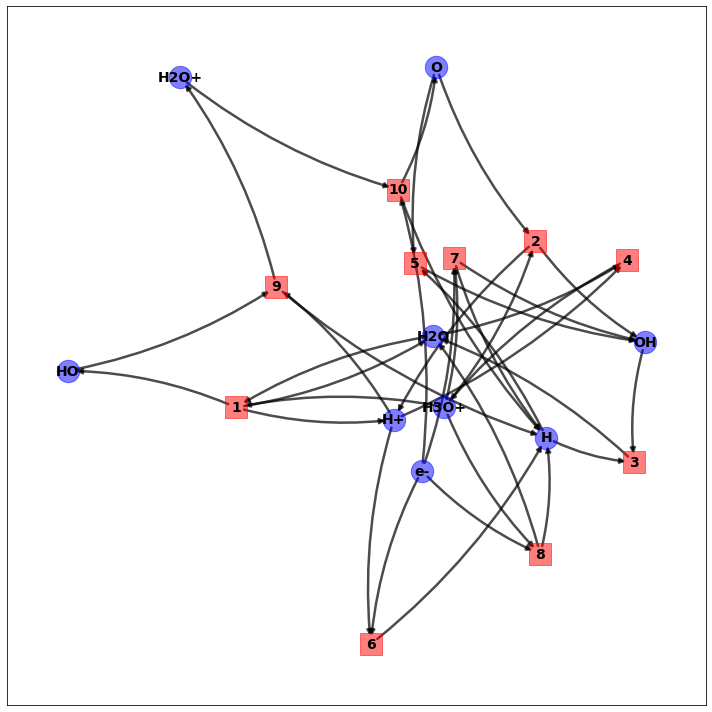

In [5]:
#print Network
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(net_g,weight=None) 
plt.rcParams['font.family'] = 'Times New Roman'
edges = nx.draw_networkx_edges(net_g, 
    pos,   
    alpha=0.7,
    node_size=280,
    connectionstyle="arc3,rad=0.1",
    edge_color='black',
    width=2.5,
)
nodes = nx.draw_networkx_nodes(
        net_g,
        pos,
        nodelist=list(mol_vec),
        node_size=500,
        alpha = 0.5,
        node_color='blue',
        label=list(mol_vec),
    )
nx.draw_networkx_nodes(
    net_g,
    pos,
    nodelist=list(net_id),
    node_size=500,
    alpha = 0.5,
    node_color='red',
    node_shape='s',
)
nx.draw_networkx_labels(
    net_g,
    pos,
    font_size=14,
    font_weight="bold",
)
plt.tight_layout()
plt.show()